In [14]:
# IMPORTS
import PyWGCNA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [11]:
## Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')


## Load the dataset
geneExpression = working_dir + 'data/5xFAD_paper/expressionList.csv'
dataset = pd.read_csv(geneExpression)

## Make a subset to save RAM
subset_dataset_size = 1000
dataset = dataset.iloc[:, :subset_dataset_size] 
susbsetFile = working_dir + 'data/5xFAD_paper/expressionListSubset.csv' 
dataset.to_csv(susbsetFile, sep=',', index=False, encoding='utf-8') 

## Load the subset
geneExpressionsubset = working_dir + 'data/5xFAD_paper/expressionListSubset.csv'


In [12]:
figures_dir = working_dir + 'results\\WGCNA_'  # weird folder formatting, needs to be like this.

## Initialize the WGCNA with the dataset
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD',
                              species='mus musculus',
                              geneExpPath=geneExpressionsubset,
                              outputPath=figures_dir,
                              save=True,
                              networkType="unsigned",
                              powers = None)


Saving data to be True, checking requirements ...


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



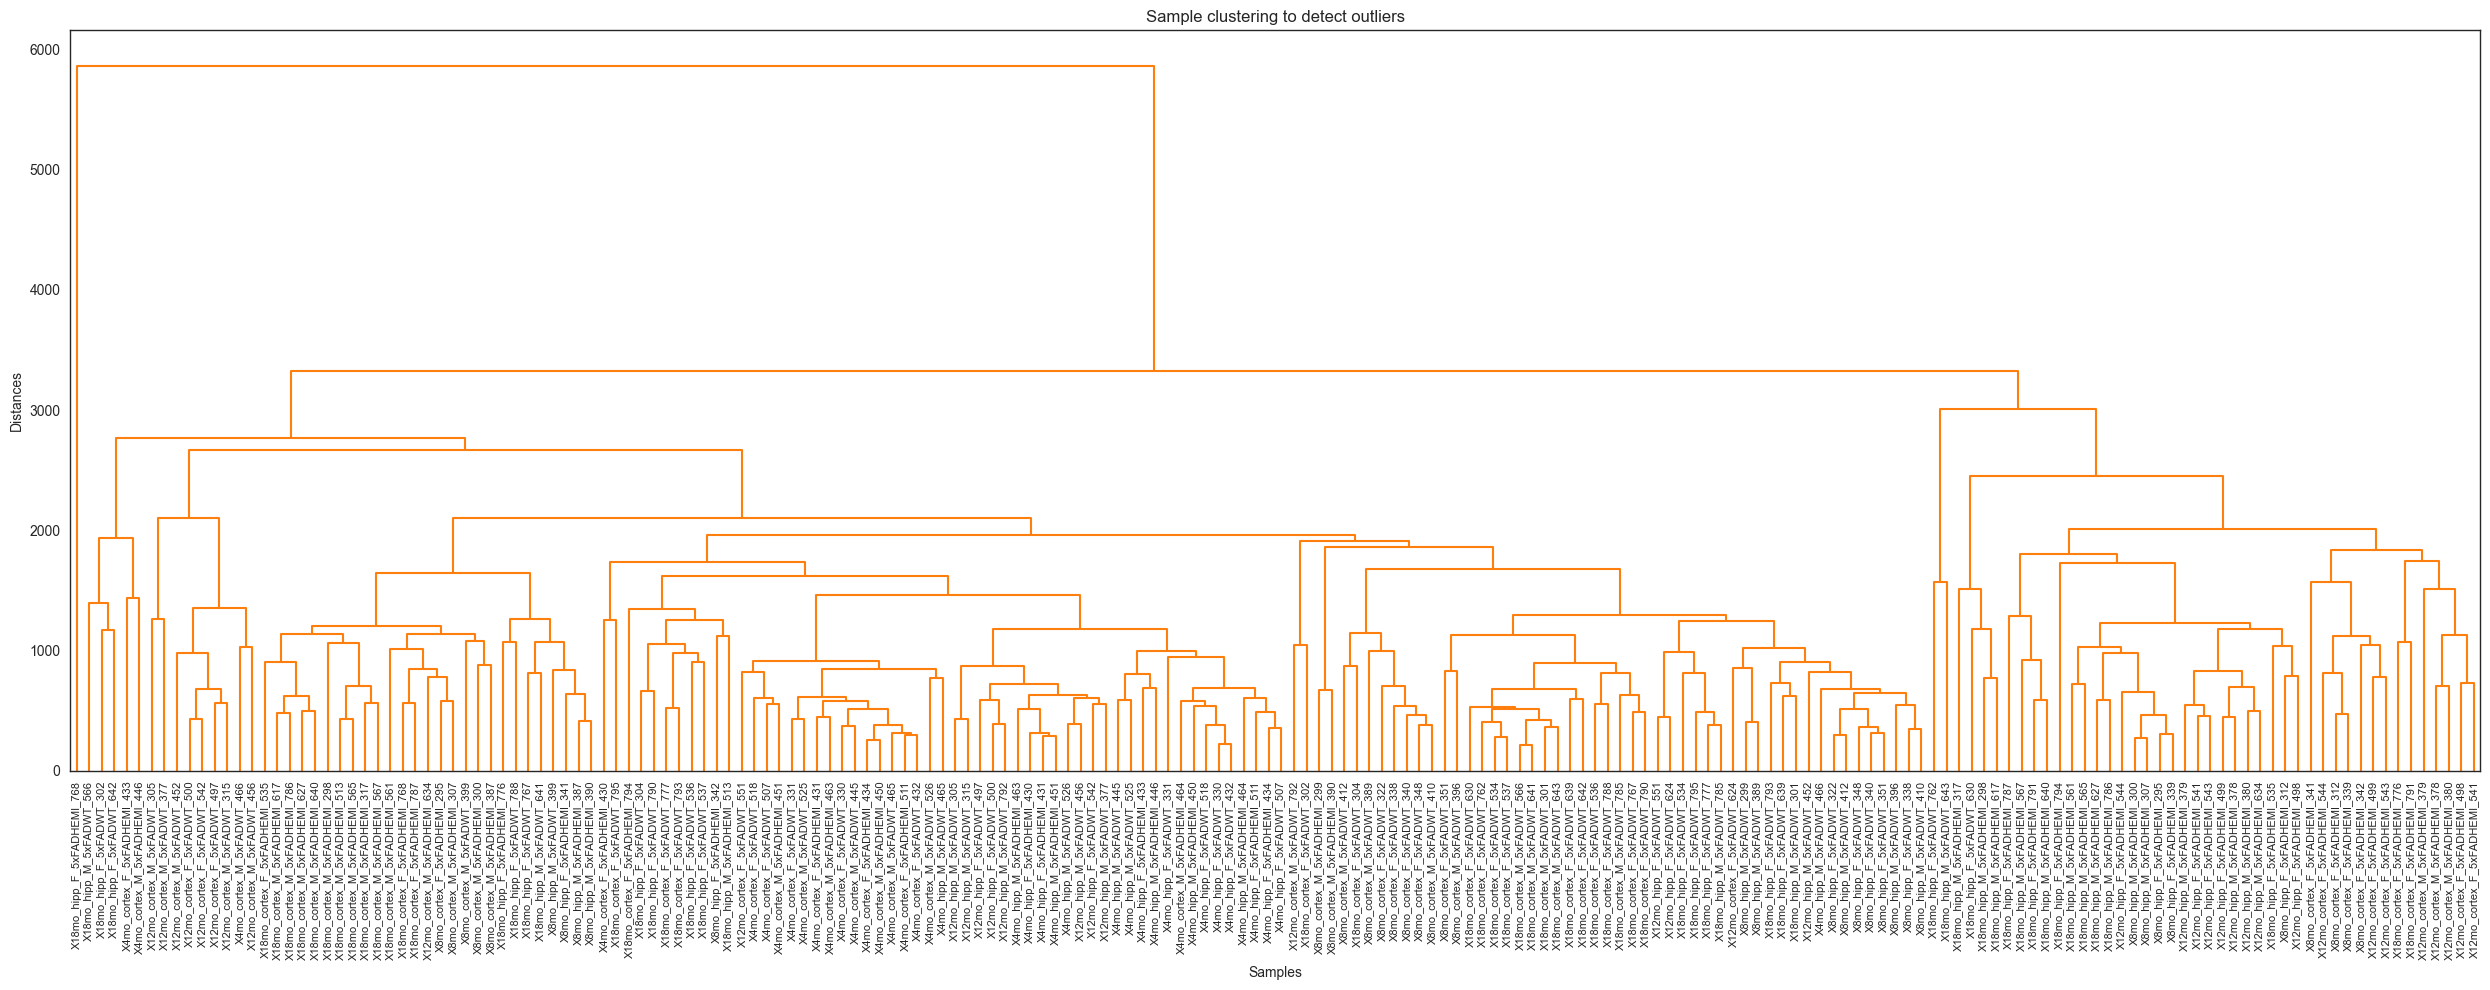

In [13]:
pyWGCNA_5xFAD.preprocess(show = True)

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  896


    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.529036  0.718384       0.928159  220.538485  218.503822   
1       2  0.295748 -0.314748       0.874506   88.463359   78.438686   
2       3  0.739801  -0.72558       0.915223   44.599207   33.688665   
3       4  0.861302  -0.99066       0.938595   25.626207   16.761069   
4       5  0.891183 -1.135978       0.942459   16.013305    9.209592   
5       6  0.927639 -1.203791       0.964241   10.607903    5.233639   
6       7  0.927083 -1.256924         0.9682    7.336714    3.188252   
7       8  0.915148 -1.320107       0.963641    5.246128    2.016734   
8       9  0.937341 -1.339698       0.978764    3.852527    1.303591   
9      10  0.931078 -1.364907       0.980199    2.891753    0.890041   
10     11  0.930048 -1.388104       0.980893     2.21087    0.638691   
11     13  0.932416 -1.413053       0.979024    1.351917    0.314941   
12     15  0.908333  -1.43179       0.948619    0.867555     0.1

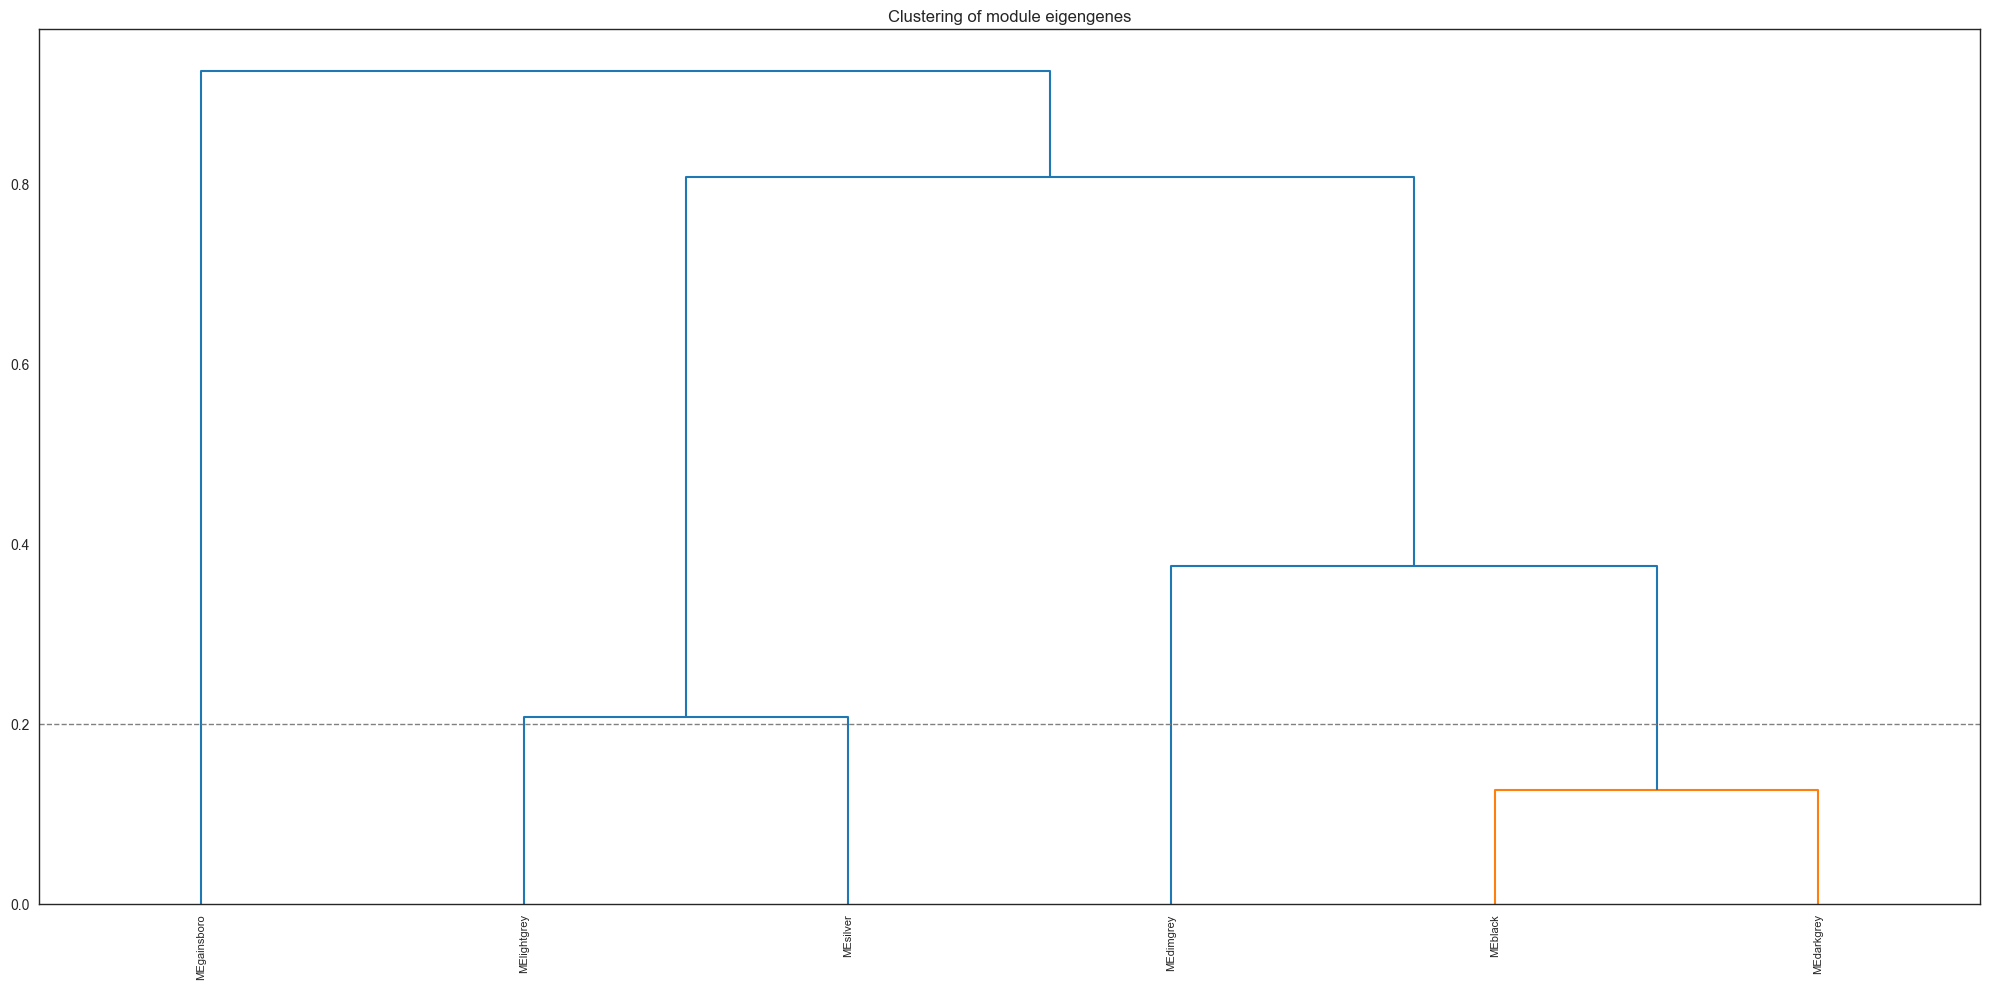

In [15]:
pyWGCNA_5xFAD.findModules()
# pyWGCNA_5xFAD.findModules(blockSize=1500, moreNetworkConcepts = True) # For some reason these don't work. Make the powerVector crash or block size goes into wrong functions

In [18]:
sample_info_path = working_dir + 'data/5xFAD_paper/sampleInfo.csv'
pyWGCNA_5xFAD.updateSampleInfo(path=sample_info_path, sep=',')

# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

In [19]:
# Automatic dataset builder from biomart.
'''
geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'],
                               server_domain="http://ensembl.org/biomart")
'''

# We already have the file, so we just load it from the file
gene_list_path = working_dir + 'data/5xFAD_paper/geneList'
pyWGCNA_5xFAD.updateGeneInfo(path=gene_list_path, sep = ' ')


Some visualizations

In [20]:
pyWGCNA_5xFAD.datExpr

#pyWGCNA_5xFAD.datExpr.obs.head(5)

AnnData object with n_obs × n_vars = 192 × 896
    obs: 'Age', 'Tissue', 'Sex', 'Genotype'
    var: 'dynamicColors', 'moduleColors', 'moduleLabels', 'gene_name', 'trancript_id'

In [21]:
np.max(pyWGCNA_5xFAD.adjacency)

0.9931036207271499

In [22]:
# Plotting the adjacency matrix as heatmap
plt.figure()
sns.heatmap(pyWGCNA_5xFAD.adjacency, cmap='hot')
plt.title("Heatmap of the adjacency matrix")
plt.show()


Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
	Done..



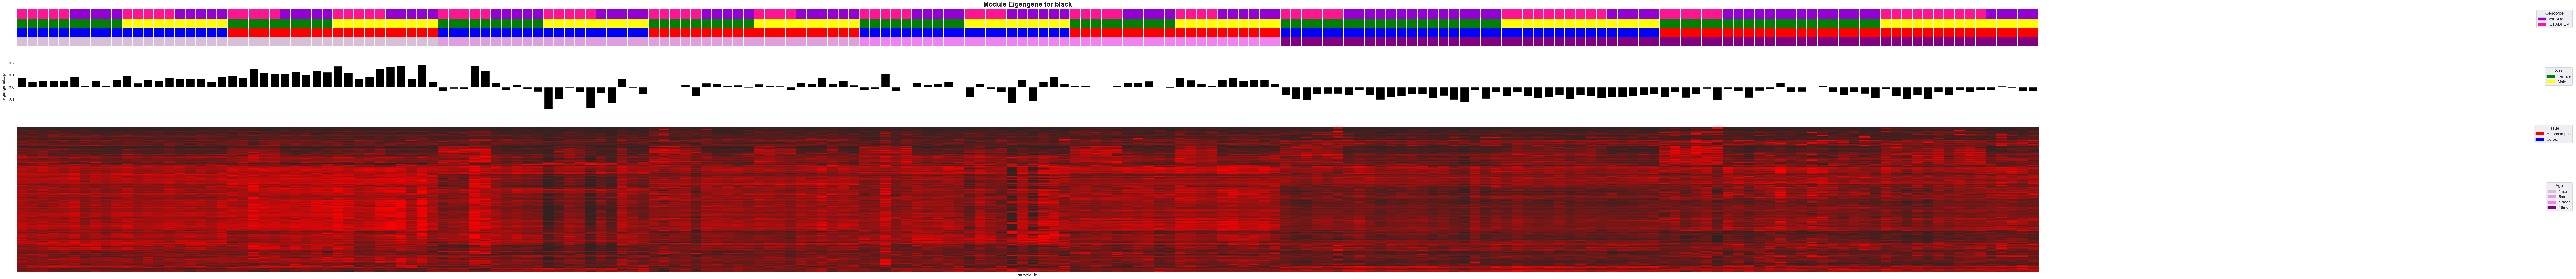

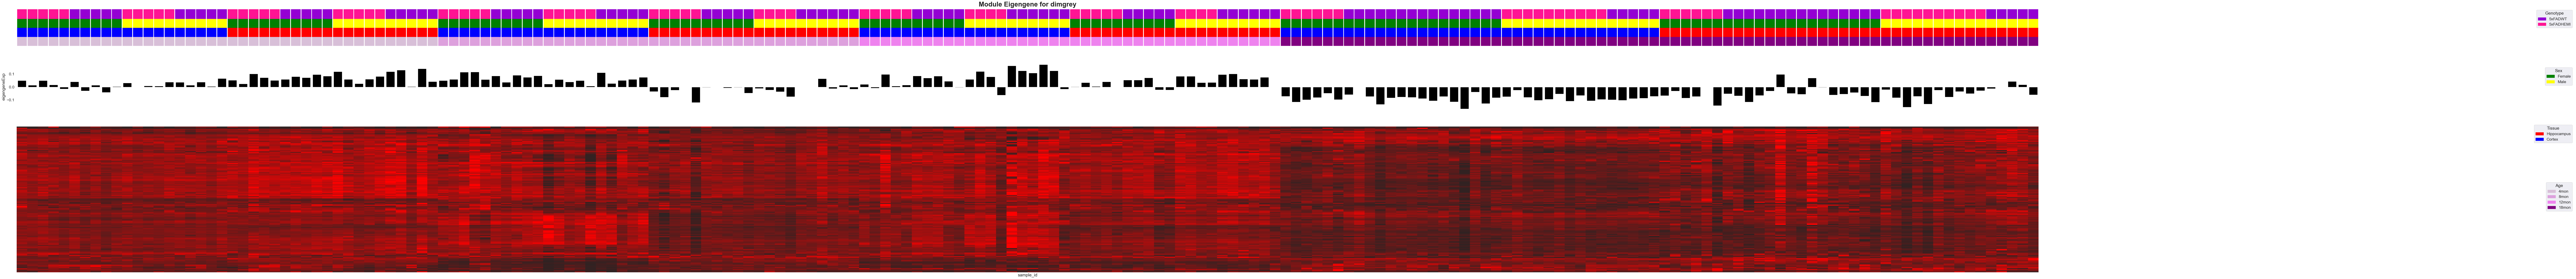

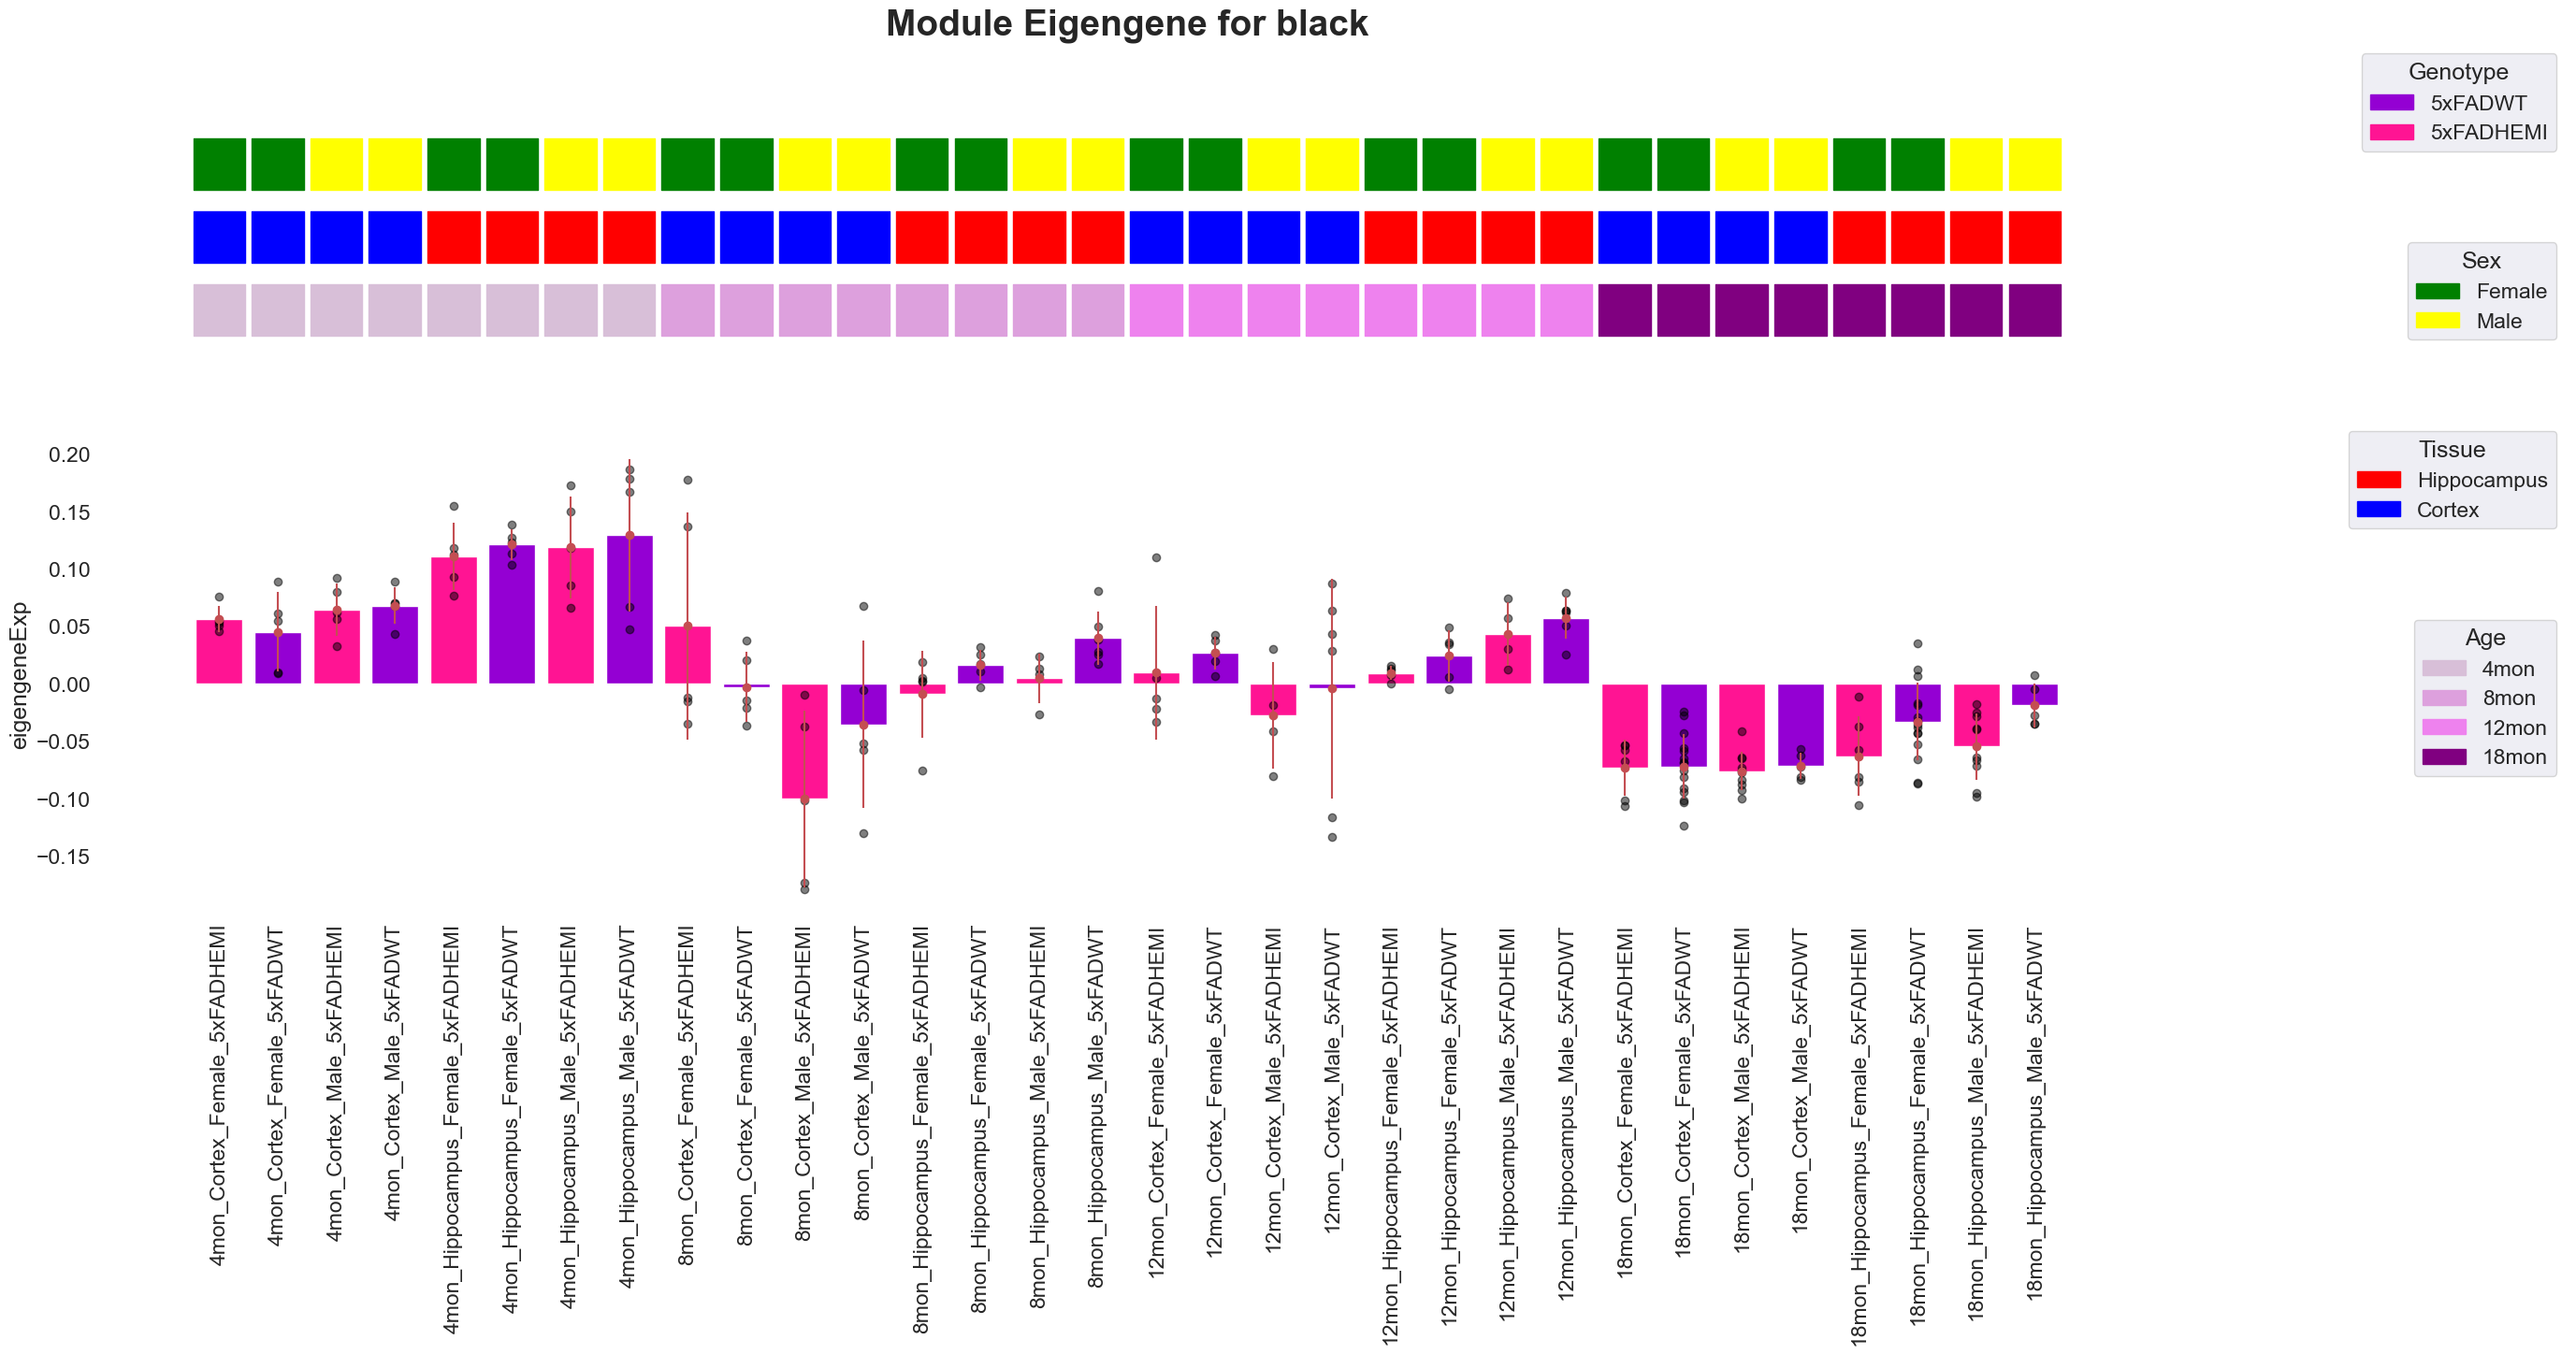

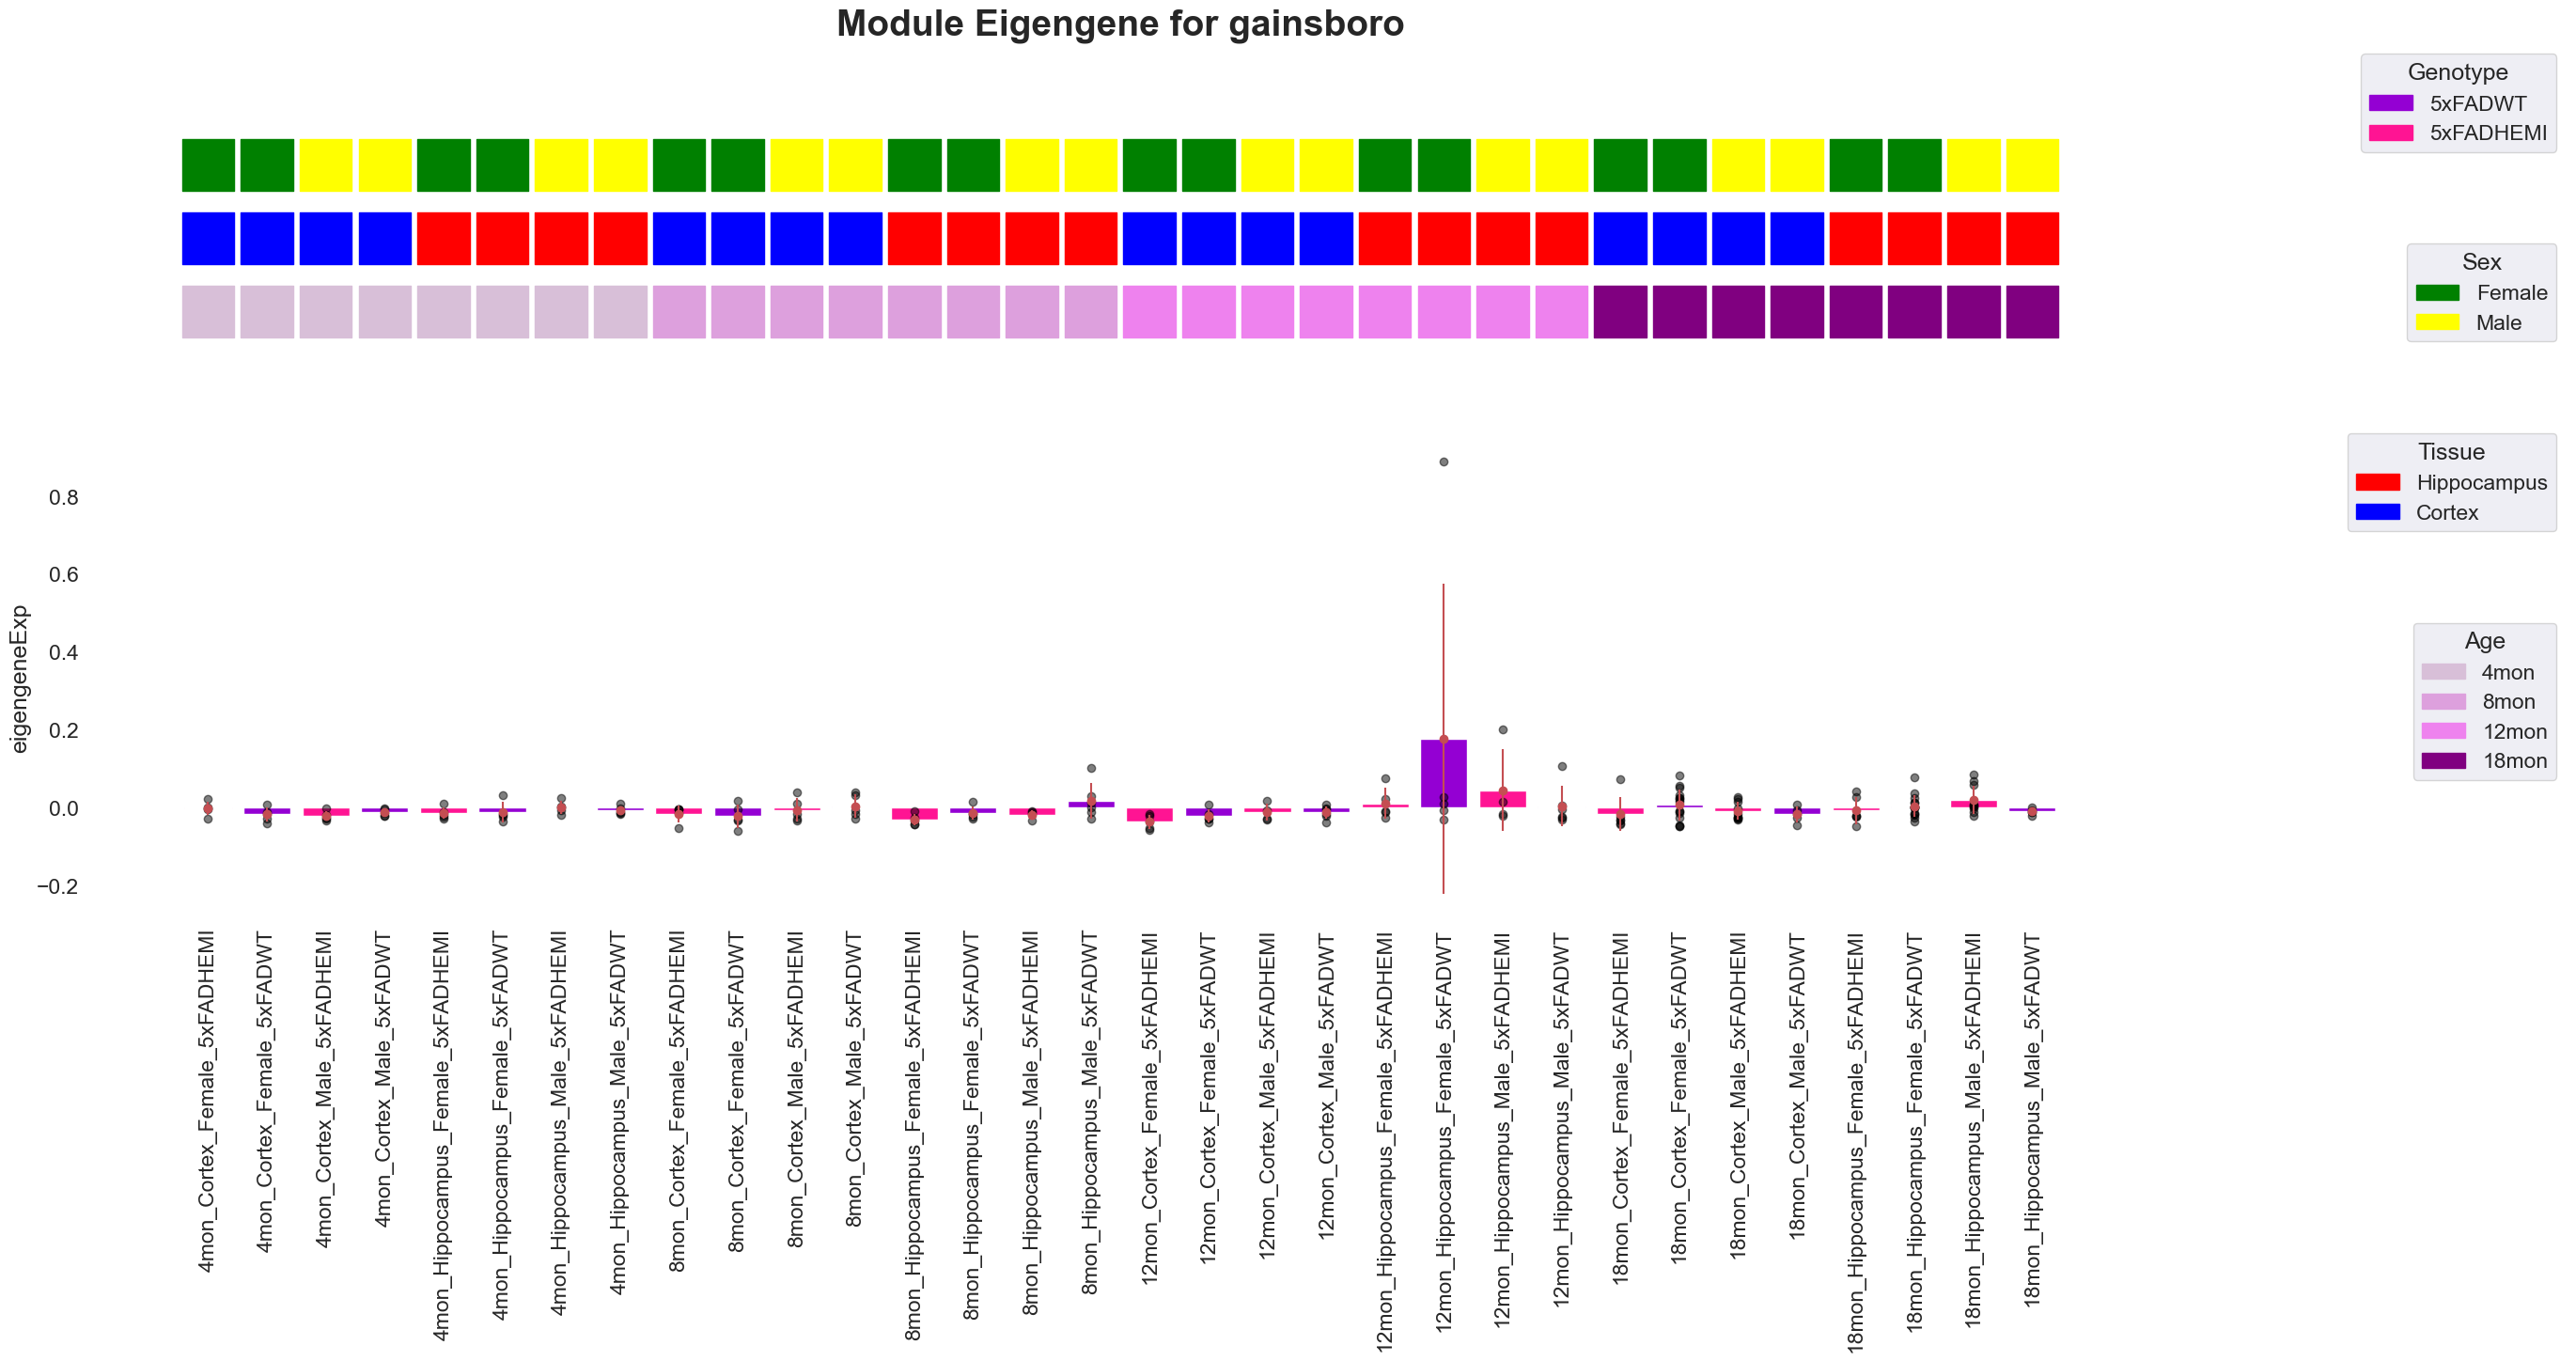

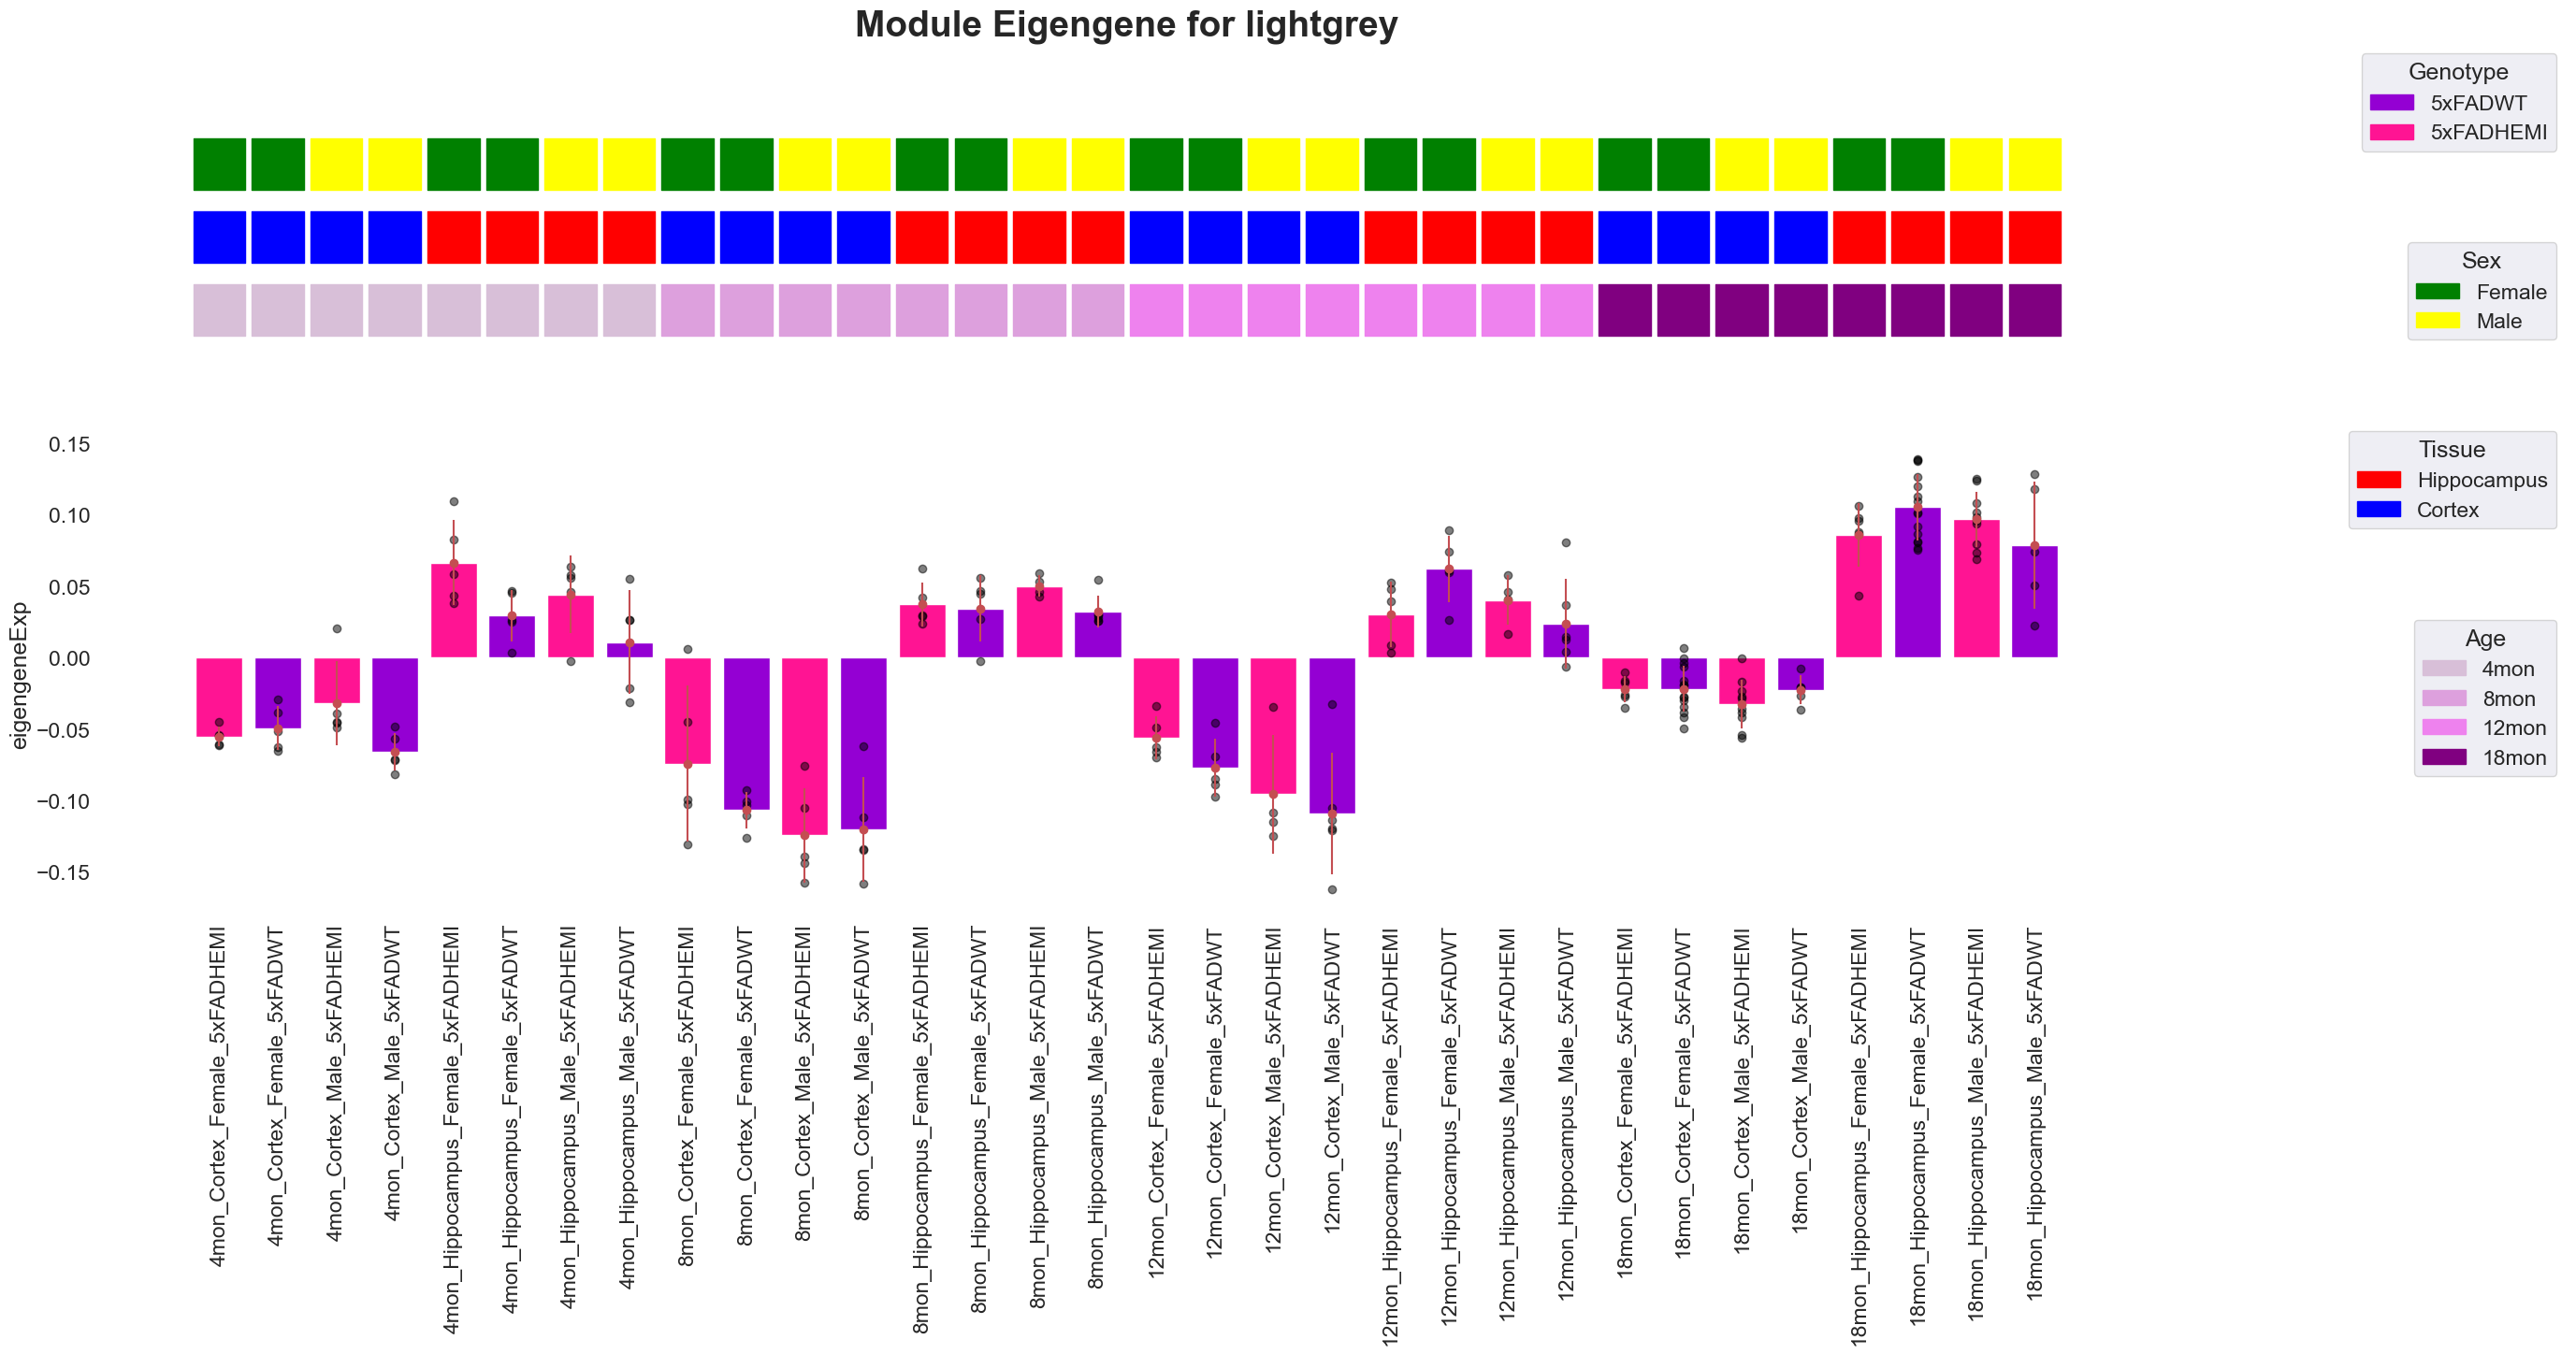

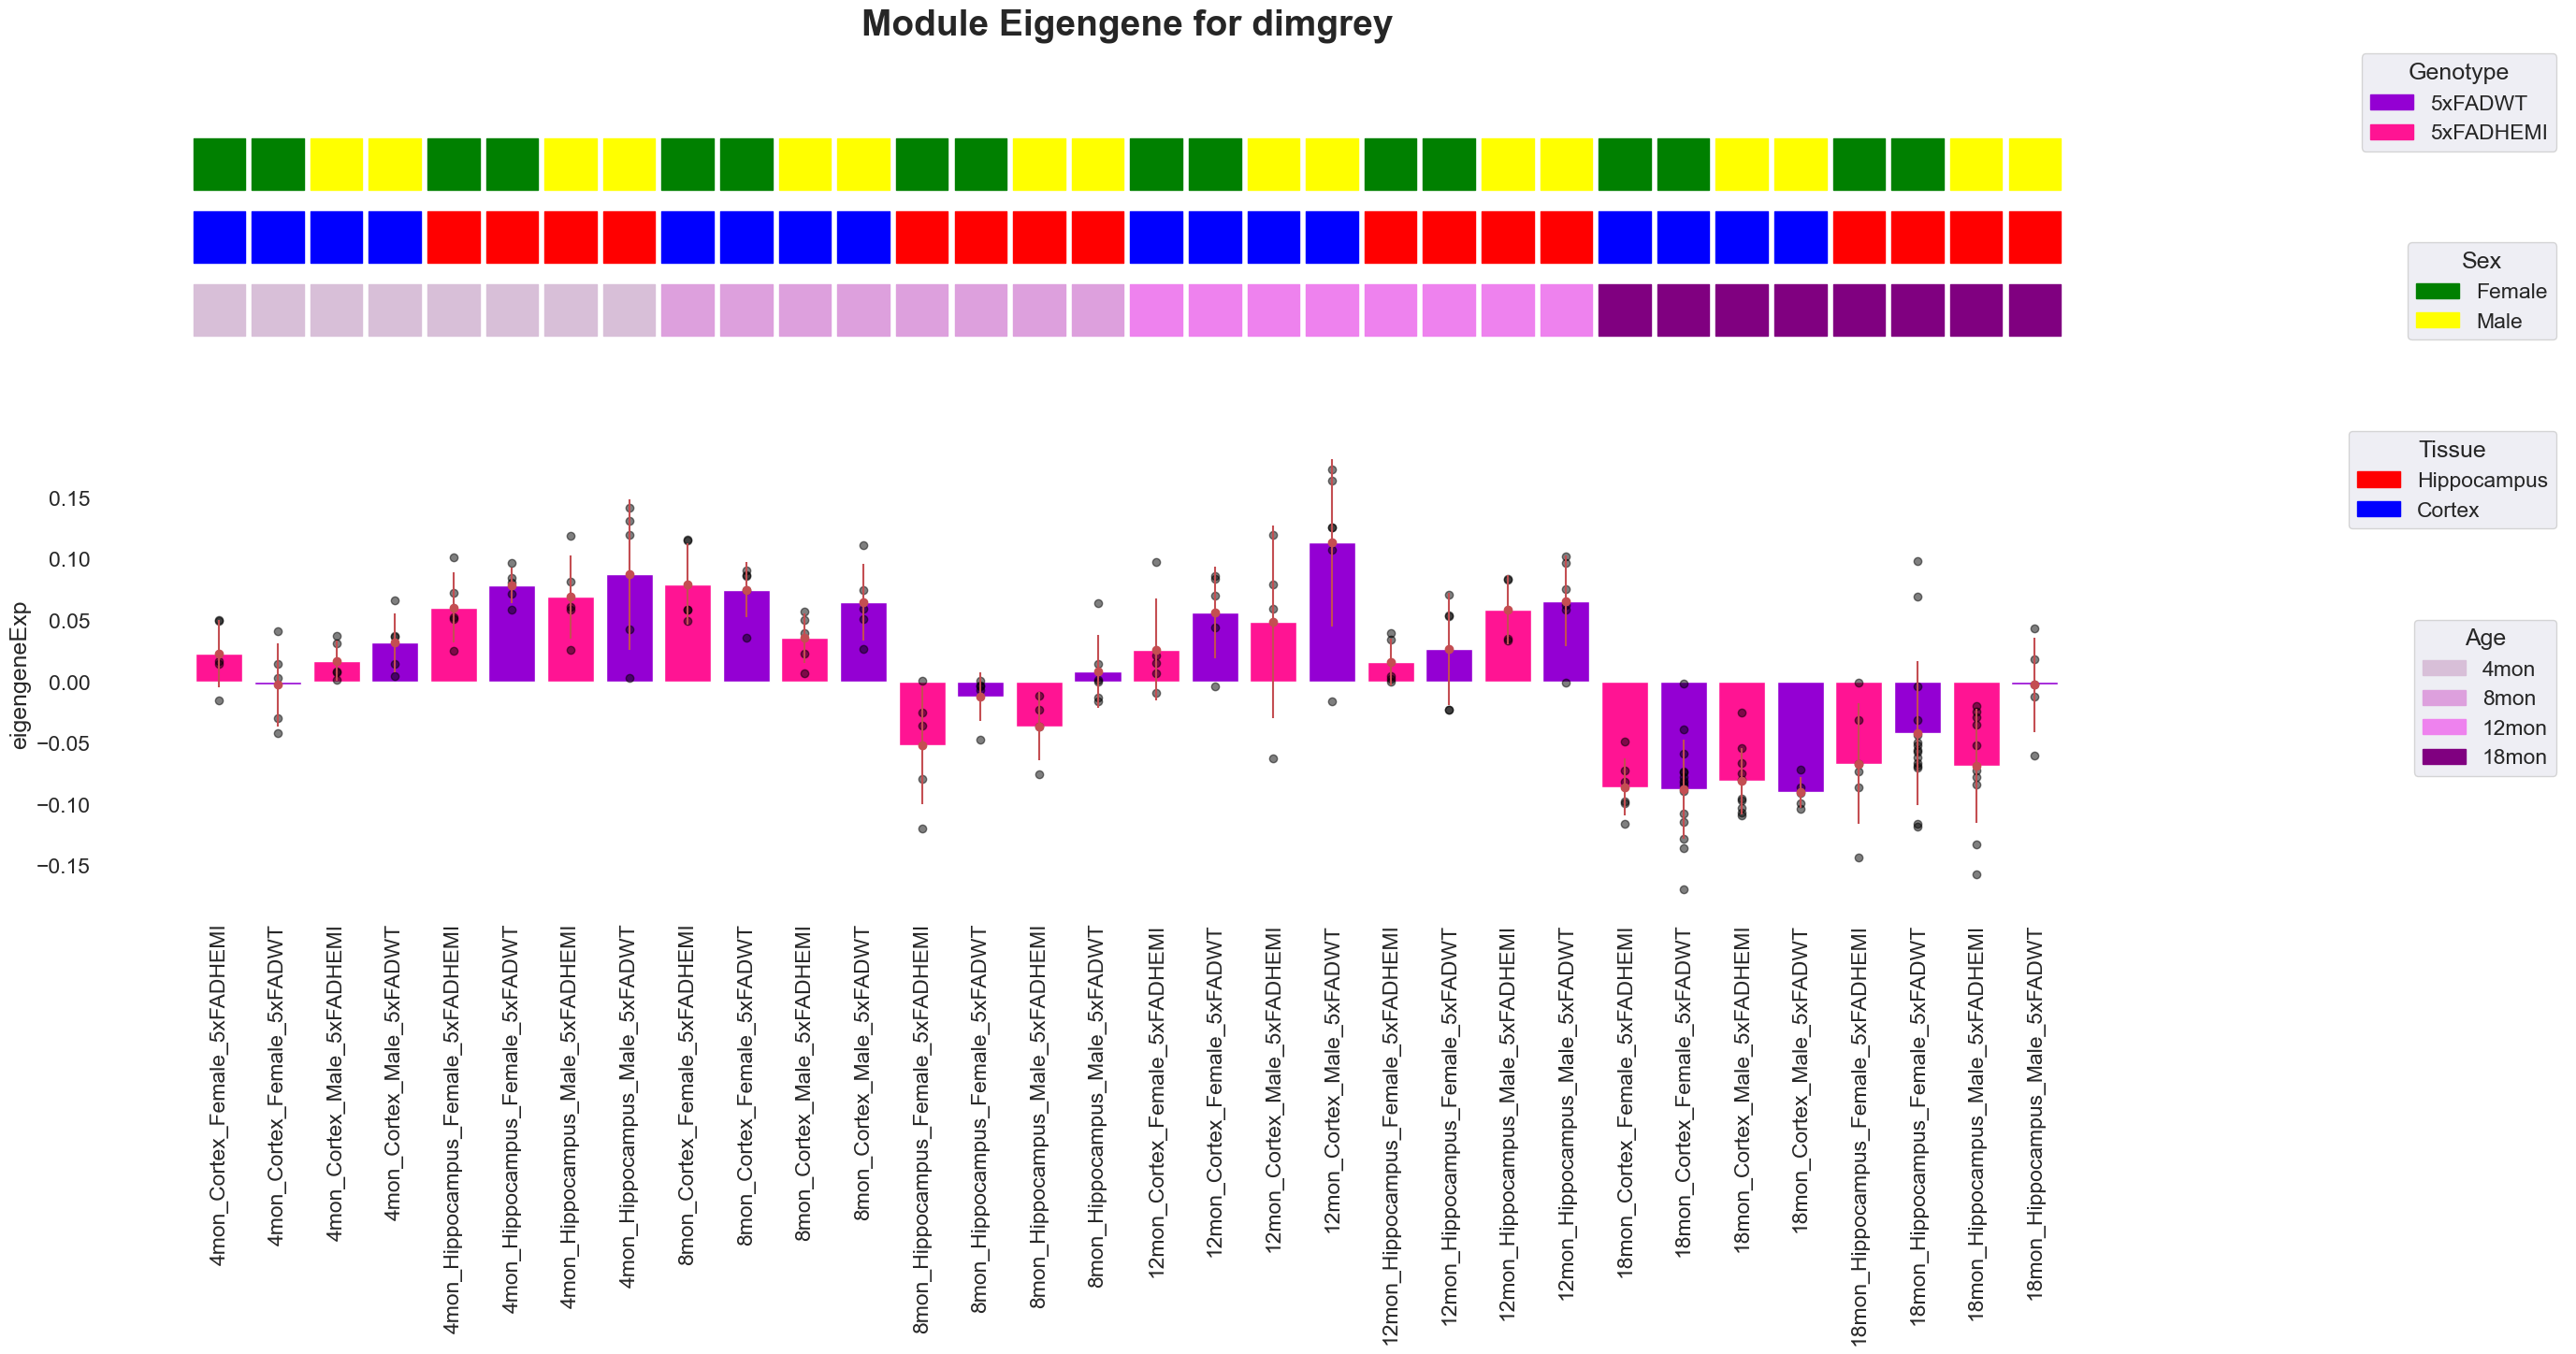

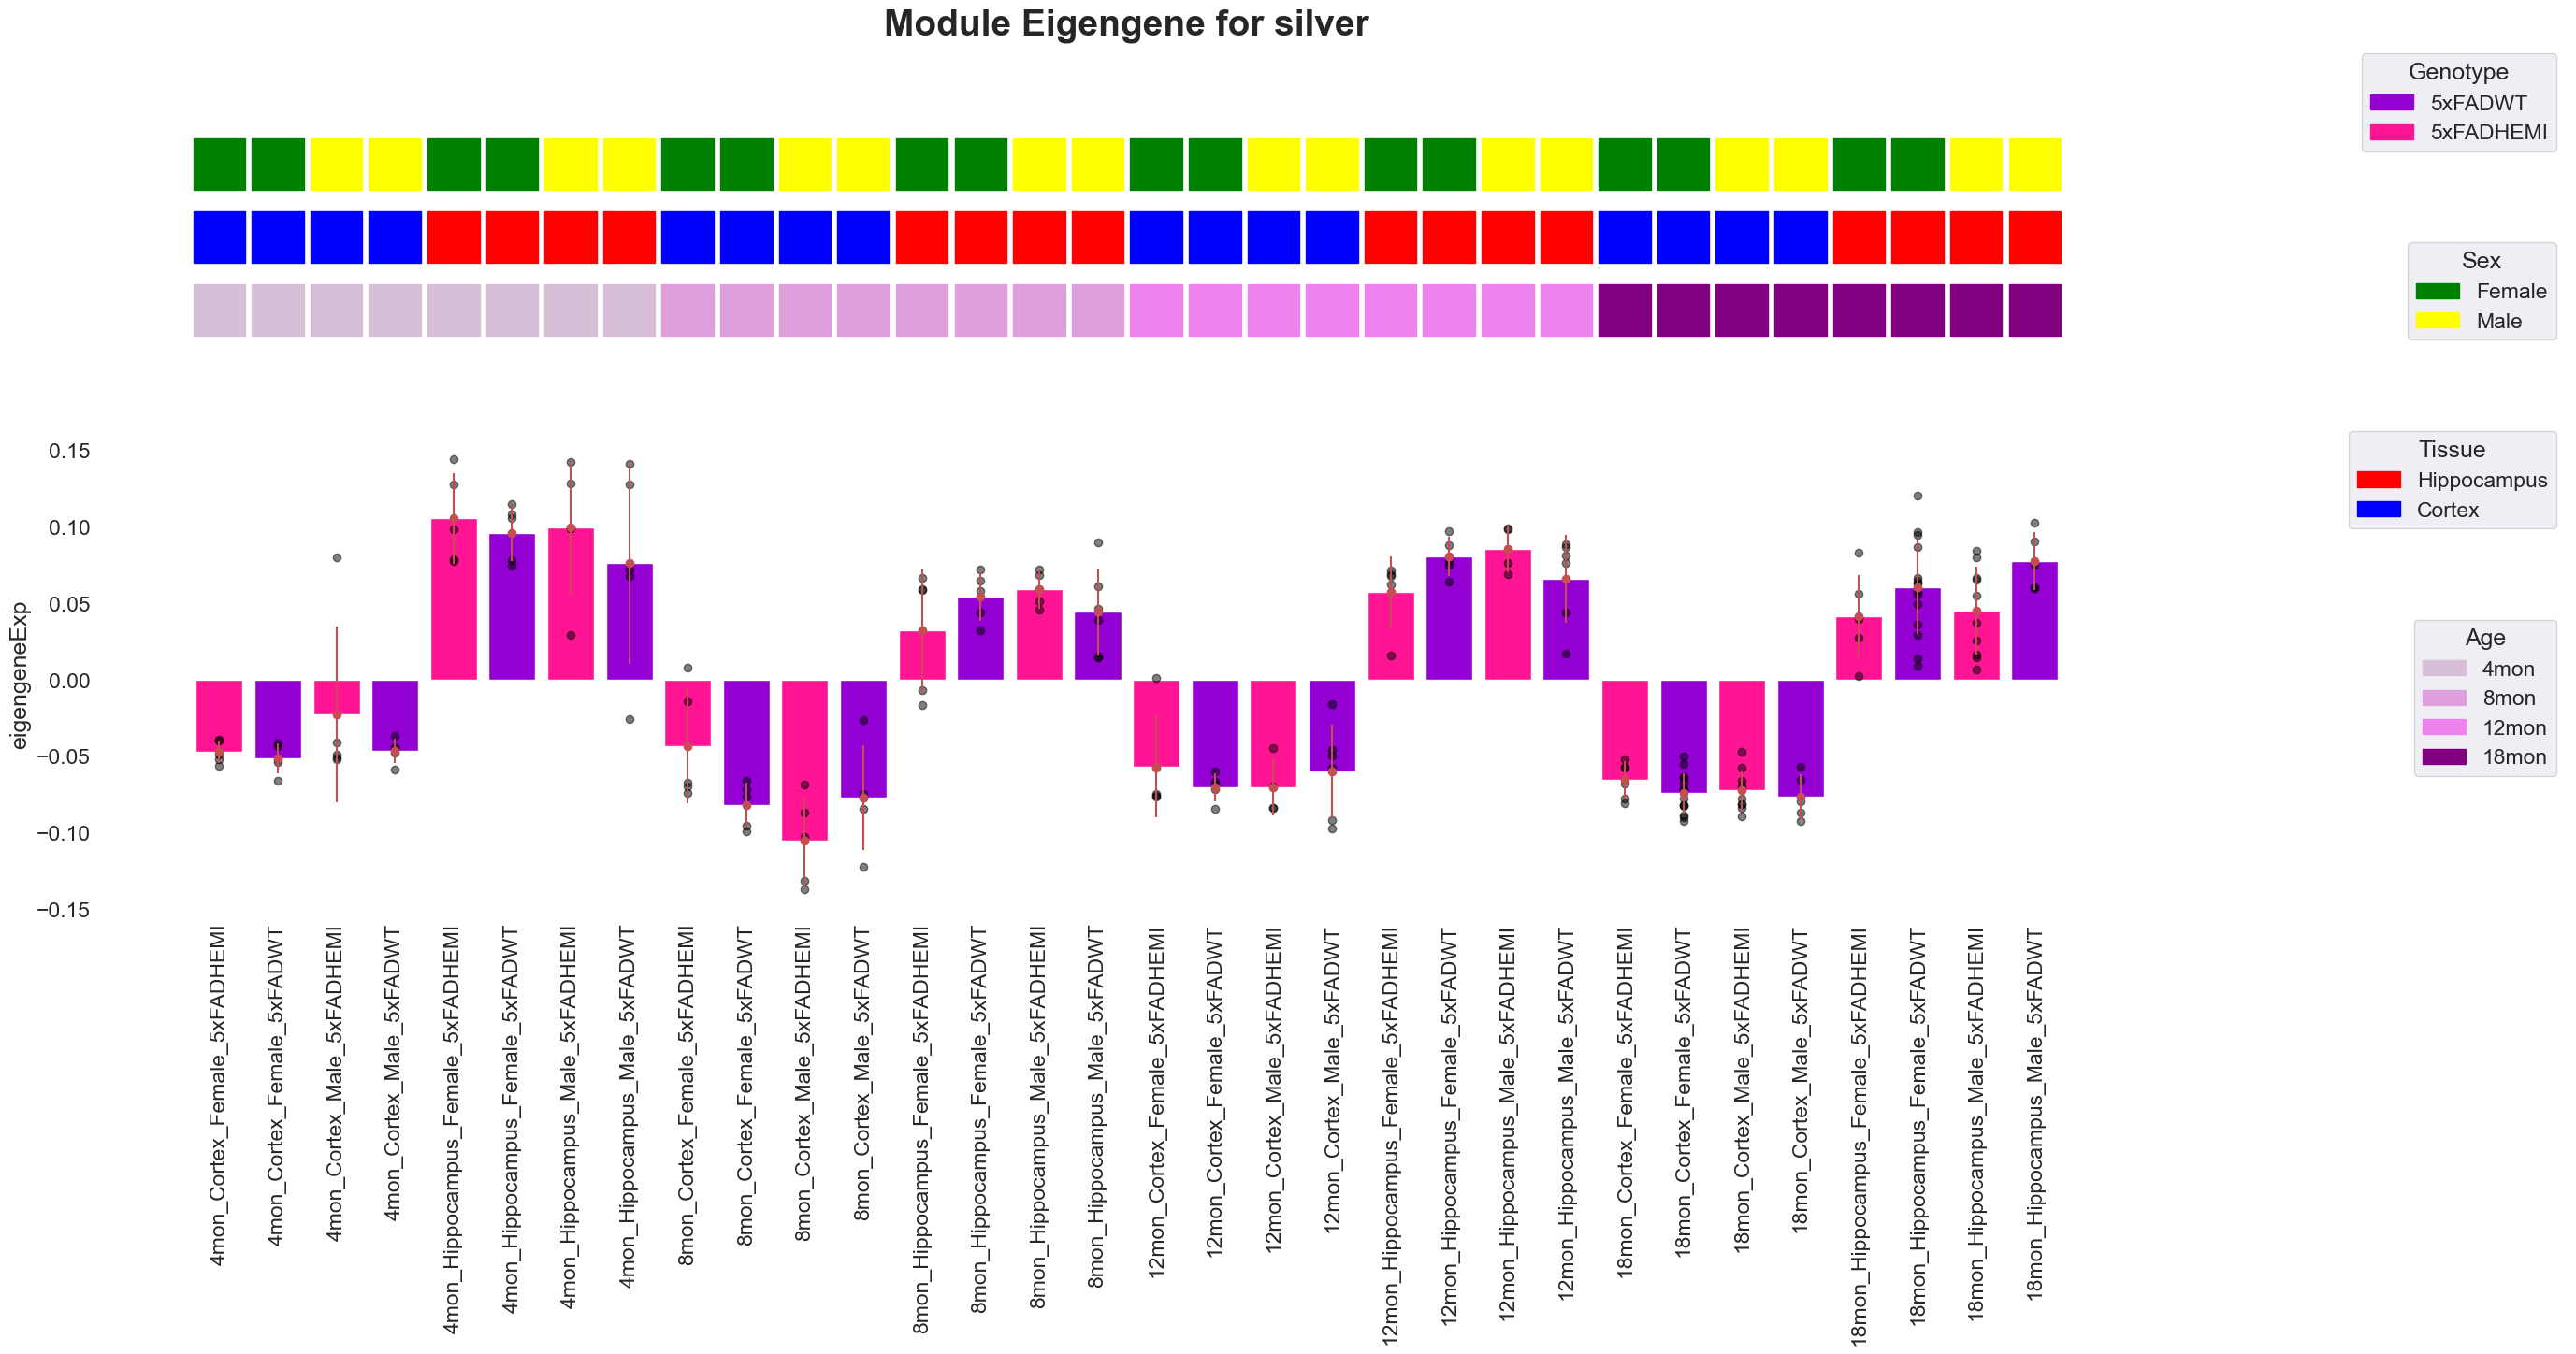

In [23]:
pyWGCNA_5xFAD.analyseWGCNA()

In [25]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="silver", n=50)


calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels  \
ENSMUSG00000005672      4.482069        silver       silver           4.0   
ENSMUSG00000002900      4.324206        silver       silver           4.0   
ENSMUSG00000001143      4.256378        silver       silver           4.0   
ENSMUSG00000005103      4.043312        silver       silver           4.0   
ENSMUSG00000000751      3.761956        silver       silver           4.0   
ENSMUSG00000000934      3.576889        silver       silver           4.0   
ENSMUSG00000001240      3.272312        silver       silver           4.0   
ENSMUSG00000006411      2.575139        silver       silver           4.0   
ENSMUSG00000005950      2.452976        silver       silver           4.0   
ENSMUSG00000001911      2.409082        silver       silver           4.0   
ENSMUSG00000006395      2.137788        silver       silver           4.0   
ENSMUSG00000000782      2.132578        silver       silver           4.0   
ENSMUSG00000006369      2.071157        silver       silver           4.0   
ENSMUSG00000002983      1.890718        silver       silver           4.0   
ENSMUSG00000002459      1.794587        silver       silver           4.0   
ENSMUSG00000004341      1.729720        silver       silver           4.0   
ENSMUSG00000000184      1.646663        silver       silver           4.0   
ENSMUSG00000004996      1.553379        silver       silver           4.0   
ENSMUSG00000003541      1.535027        silver       silver           4.0   
ENSMUSG00000004446      1.467898        silver       silver           4.0   
ENSMUSG00000005465      1.451387        silver       silver           4.0   
ENSMUSG00000000861      1.394842        silver       silver           4.0   
ENSMUSG00000005237      1.332887        silver       silver           4.0   
ENSMUSG00000001021      1.320355        silver       silver           4.0   
ENSMUSG00000002059      1.319044        silver       silver           4.0   
ENSMUSG00000005107      1.193450        silver       silver           4.0   
ENSMUSG00000006169      1.130759        silver       silver           4.0   
ENSMUSG00000003873      1.073768        silver       silver           4.0   
ENSMUSG00000002944      1.060684        silver       silver           4.0   
ENSMUSG00000000318      1.027180        silver       silver           4.0   
ENSMUSG00000001280      1.019136        silver       silver           4.0   

                   gene_name           trancript_id  
ENSMUSG00000005672       Kit  ENSMUSG00000005672.12  
ENSMUSG00000002900     Lamb1  ENSMUSG00000002900.16  
ENSMUSG00000001143    Lman2l  ENSMUSG00000001143.13  
ENSMUSG00000005103      Wdr1  ENSMUSG00000005103.12  
ENSMUSG00000000751      Rpa1  ENSMUSG00000000751.13  
ENSMUSG00000000934    Top1mt   ENSMUSG00000000934.9  
ENSMUSG00000001240     Ramp2  ENSMUSG00000001240.13  
ENSMUSG00000006411   Nectin4  ENSMUSG00000006411.12  
ENSMUSG00000005950     P2rx5  ENSMUSG00000005950.14  
ENSMUSG00000001911      Nfix  ENSMUSG00000001911.16  
ENSMUSG00000006395       Hyi  ENSMUSG00000006395.16  
ENSMUSG00000000782      Tcf7  ENSMUSG00000000782.15  
ENSMUSG00000006369     Fbln1  ENSMUSG00000006369.14  
ENSMUSG00000002983      Relb  ENSMUSG00000002983.17  
ENSMUSG00000002459     Rgs20  ENSMUSG00000002459.17  
ENSMUSG00000004341      Gpx6   ENSMUSG00000004341.8  
ENSMUSG00000000184     Ccnd2  ENSMUSG00000000184.12  
ENSMUSG00000004996      Mri1   ENSMUSG00000004996.9  
ENSMUSG00000003541      Ier3   ENSMUSG00000003541.6  
ENSMUSG00000004446       Bid  ENSMUSG00000004446.12  
ENSMUSG00000005465    Il27ra   ENSMUSG00000005465.9  
ENSMUSG00000000861    Bcl11a  ENSMUSG00000000861.15  
ENSMUSG00000005237     Dnah2  ENSMUSG00000005237.14  
ENSMUSG00000001021    S100a3  ENSMUSG00000001021.12  
ENSMUSG00000002059     Rab34  ENSMUSG00000002059.18  
ENSMUSG00000005107    Slc2a9  ENSMUSG00000005107.13  
ENSMUSG00000006169    Clint1  ENSMUSG00000006169.19  
ENSMUSG00000003873       Bax  ENSMUSG000000